# Classification example

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## Import Data

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
print(mnist.DESCR)

mldata.org dataset: mnist-original


In [3]:
X = mnist.data.astype('float64')
y = mnist.target

## Split Data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X, y = mnist.data / 255., mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model training

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

# Train the model using the training sets
model.fit(X_train, y_train)

Iteration 1, loss = 0.32909886
Iteration 2, loss = 0.15835491
Iteration 3, loss = 0.11672188
Iteration 4, loss = 0.09567278
Iteration 5, loss = 0.07785009
Iteration 6, loss = 0.06858979
Iteration 7, loss = 0.06016700
Iteration 8, loss = 0.05361004
Iteration 9, loss = 0.04723959
Iteration 10, loss = 0.04258099


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

## Test and Evaluate

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Make predictions using the testing set
y_predictions = model.predict(X_test)

# Metrics
print('Confusion matrix')
print(confusion_matrix(y_test, y_predictions))

print('\nclassification report')
print(classification_report(y_test, y_predictions))

Confusion matrix
[[1319    0    4    0    1    7    5    0    9    4]
 [   0 1557    8    1    0    0    4    2    7    2]
 [   6    4 1344    8    2    0    5   10   20    1]
 [   3    1    8 1354    0   32    1    7   25    3]
 [   4    0    4    0 1297    0    2    6    0   15]
 [   3    3    1   10    2 1226   10    0   16   15]
 [   7    1    3    1    2    8 1377    1    7    0]
 [   1    3    6    3    2    0    0 1441    2   18]
 [   4    8    4    7    5    7    1    2 1340   13]
 [   1    1    0    2   12    7    0    8   14 1303]]

classification report
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      1349
        1.0       0.99      0.98      0.99      1581
        2.0       0.97      0.96      0.97      1400
        3.0       0.98      0.94      0.96      1434
        4.0       0.98      0.98      0.98      1328
        5.0       0.95      0.95      0.95      1286
        6.0       0.98      0.98      0.98      1407
    

## Explore classifier

In [10]:
import matplotlib.pyplot as plt

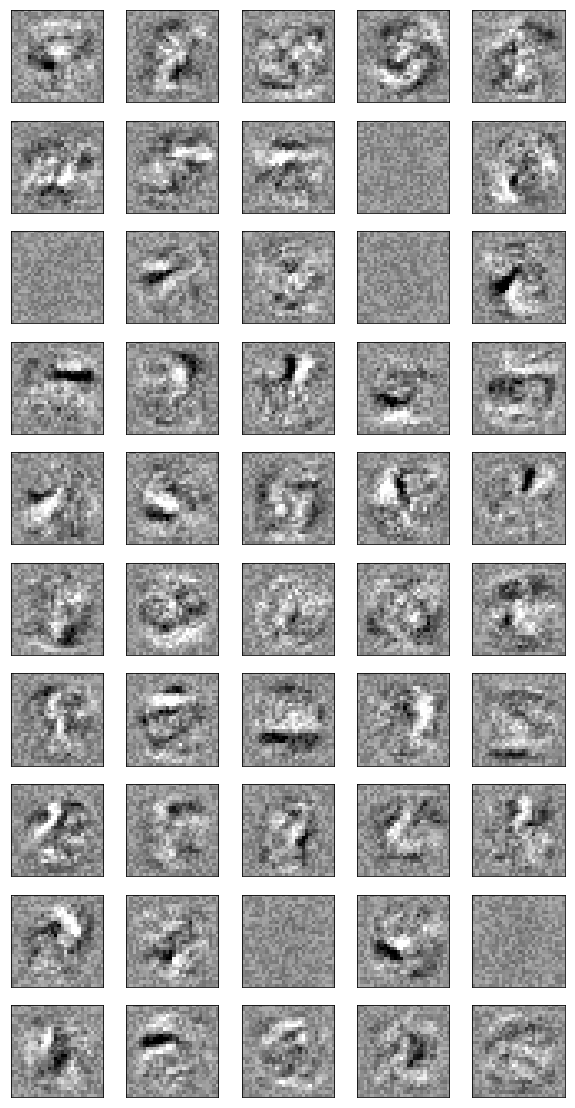

In [11]:
fig, axes = plt.subplots(10, 5,figsize=(10,20))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


## Exercise

1. How would you implement crossvalidation? search and try!
2. Can you use another model for this classification? try another one (SVM).